In [ ]:
import numpy as np # lineer Cebir
import pandas as pd # veri işleme
import os
print(os.listdir("/content/drive/MyDrive/data"))

['train', 'validation', 'test']


In [ ]:
import os, shutil

original_dataset_dir = '/content/drive/MyDrive/data'

train_dir = '/content/drive/MyDrive/data/train'
validation_dir = '/content/drive/MyDrive/data/validation'
test_dir = '/content/drive/MyDrive/data/test'

train_benign_dir ='/content/drive/MyDrive/data/train/benign'
train_malignant_dir = '/content/drive/MyDrive/data/train/malignant'

validation_benign_dir = '/content/drive/MyDrive/data/validation/benign'
validation_malignant_dir ='/content/drive/MyDrive/data/validation/malignant'

test_benign_dir = '/content/drive/MyDrive/data/test/benign'
test_malignant_dir = '/content/drive/MyDrive/data/test/malignant'

In [ ]:
from keras import layers
from keras import models
#katmanlar ve düğüm
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
# sigmoid kullanarak çıkan değeri [0,1] arasına sıkıştırdık
# ikili sınıflandırma var (hasta ve sağlıklı)
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from keras import optimizers
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator ## veri çeşitlendirme
train_datagen = ImageDataGenerator(#augmendation  test verilerine uygulanmadı
                rescale = 1./255,
                # resim pixellerini 0,1 arasına sıkıştırma
                rotation_range=40,# derece cinsinden (0-180) resimlerin rastgele döndürülme açısı
                width_shift_range=0.2, # resimlerin yatayda ve dikeyde kaydırılma oranları
                height_shift_range=0.2,# resimlerin yatayda ve dikeyde kaydırılma oranları
                shear_range=0.2,#burkma
                zoom_range=0.2,# yakınlaştırma işlemi
                horizontal_flip=True,# dikeyde resim döndürme
                # işlemlerden sonra ortaya çıkan  fazla 
      # görüntü noktalarının nasıl doldurulacağını belirler
      fill_mode='nearest')
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (150, 150),
                    batch_size = 20,
                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(#doğrulama
                        validation_dir,
                        target_size = (150, 150),
                        batch_size = 20,
                        class_mode = 'binary')


Found 2109 images belonging to 2 classes.
Found 528 images belonging to 2 classes.


In [ ]:
history = model.fit(
                train_generator,
                steps_per_epoch = 20,
                epochs = 5,
                validation_data = validation_generator,
                validation_steps = 10)

Epoch 1/5
20/20 [==============================] - 113s 5s/step - loss: 0.6903 - acc: 0.5100 - val_loss: 0.6727 - val_acc: 0.6500
Epoch 2/5
20/20 [==============================] - 69s 3s/step - loss: 0.6613 - acc: 0.6200 - val_loss: 0.5855 - val_acc: 0.7900
Epoch 3/5
20/20 [==============================] - 54s 3s/step - loss: 0.5952 - acc: 0.7100 - val_loss: 0.5285 - val_acc: 0.7900
Epoch 4/5
20/20 [==============================] - 40s 2s/step - loss: 0.5219 - acc: 0.7584 - val_loss: 0.4800 - val_acc: 0.7850
Epoch 5/5
20/20 [==============================] - 32s 2s/step - loss: 0.5666 - acc: 0.7095 - val_loss: 0.5207 - val_acc: 0.7550


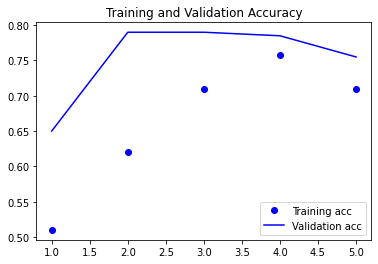

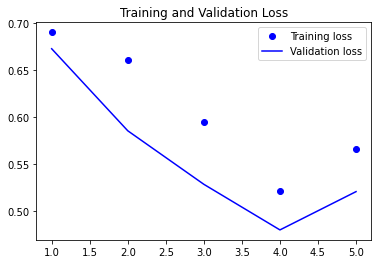

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
model.save('augmentationeklendi.h5')